In [46]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [47]:
#reading the image 
im = cv2.imread('pelak/1/1 (1).jpg')

# check if the image was loaded successfully
if im is None:
	print("Failed to load the image.")
else:
	print("Image loaded successfully.")

Image loaded successfully.


In [48]:
#displaying the image

cv2.imshow('image', im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
files  = os.listdir('pelak/1') # list all files in the directory
print(files) 

['1 (1).jpg', '1 (10).jpg', '1 (100).jpg', '1 (101).jpg', '1 (102).jpg', '1 (103).jpg', '1 (104).jpg', '1 (105).jpg', '1 (106).jpg', '1 (107).jpg', '1 (108).jpg', '1 (109).jpg', '1 (11).jpg', '1 (110).jpg', '1 (111).jpg', '1 (112).jpg', '1 (113).jpg', '1 (114).jpg', '1 (115).jpg', '1 (116).jpg', '1 (117).jpg', '1 (118).jpg', '1 (119).jpg', '1 (12).jpg', '1 (120).jpg', '1 (121).jpg', '1 (122).jpg', '1 (123).jpg', '1 (124).jpg', '1 (125).jpg', '1 (126).jpg', '1 (127).jpg', '1 (128).jpg', '1 (129).jpg', '1 (13).jpg', '1 (130).jpg', '1 (131).jpg', '1 (132).jpg', '1 (133).jpg', '1 (134).jpg', '1 (135).jpg', '1 (136).jpg', '1 (137).jpg', '1 (138).jpg', '1 (139).jpg', '1 (14).jpg', '1 (140).jpg', '1 (141).jpg', '1 (142).jpg', '1 (143).jpg', '1 (144).jpg', '1 (145).jpg', '1 (146).jpg', '1 (147).jpg', '1 (148).jpg', '1 (149).jpg', '1 (15).jpg', '1 (150).jpg', '1 (151).jpg', '1 (152).jpg', '1 (153).jpg', '1 (154).jpg', '1 (155).jpg', '1 (156).jpg', '1 (157).jpg', '1 (158).jpg', '1 (159).jpg', '1

In [50]:
#making dataset for the number 1
x = np.empty((0, 256)) # create an empty array to store the images
y = np.array([]) # create an empty array to store the labels

for filename in files:
    im = cv2.imread("pelak/1/" + filename)
    im2 = cv2.resize(im, (8,32)) # resize the image to 8x32 for every image
    im3 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # convert the image to gray (altering from 3d to 2d)
    im4 = im3.flatten() # flatten the image to 1d
    x =np.append(x, [im4], axis=0) # append the image to the dataset, axis=0 means we are adding a new row and im4 is the new row
    y = np.append(y, 1) # append the label to the dataset


In [51]:
x.shape #check to see if the dataset is correct (350 photo of 1d of 256)

(350, 256)

In [52]:
y.shape

(350,)

In [53]:
#making dataset for the number 2
files = os.listdir('pelak/2') # list all files in the directory
for filename in files:
    im = cv2.imread("pelak/2/" + filename)
    im2 = cv2.resize(im, (8,32)) # resize the image to 8x32 for every image
    im3 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # convert the image to gray (altering from 3d to 2d)
    im4 = im3.flatten() # flatten the image to 1d
    x =np.append(x, [im4], axis=0) # append the image to the dataset, axis=0 means we are adding a new row and im4 is the new row
    y = np.append(y, 2) # append the label to the dataset


In [54]:
x.shape

(753, 256)

In [55]:
for k in range(3,10):
    files = os.listdir('pelak/' + str(k)) # list all files in the directory
    for filename in files:
        im = cv2.imread("pelak/" + str(k) + "/" + filename)
        im2 = cv2.resize(im, (8,32)) # resize the image to 8x32 for every image
        im3 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # convert the image to gray (altering from 3d to 2d)
        im4 = im3.flatten() # flatten the image to 1d
        x =np.append(x, [im4], axis=0) # append the image to the dataset, axis=0 means we are adding a new row and im4 is the new row
        y = np.append(y, k) # append the label to the dataset

In [73]:
x.shape

(3101, 256)

In [57]:
y.shape

(3101,)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [59]:
model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\USer\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
out = model.predict(X_test)

In [61]:
accuracy = model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9066022544283414


In [62]:
img = cv2.imread('pelak.png', 0) #0 is for gray

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
img.shape

(90, 411)

In [63]:
s = 90- np.sum(img, axis=0, keepdims=True)/255 # sum the image to get the vertical line
s

array([[7.25490196e-01, 1.61568627e+00, 2.78823529e+00, 4.43921569e+00,
        4.36470588e+00, 3.77254902e+00, 4.54117647e+00, 7.02745098e+00,
        9.80392157e+00, 1.19607843e+01, 1.38941176e+01, 1.76196078e+01,
        2.14392157e+01, 2.48078431e+01, 2.80549020e+01, 3.16392157e+01,
        3.54274510e+01, 4.21294118e+01, 5.16313725e+01, 5.64745098e+01,
        5.43882353e+01, 5.19647059e+01, 4.90470588e+01, 4.61254902e+01,
        4.24392157e+01, 3.82078431e+01, 3.34666667e+01, 2.82156863e+01,
        2.04980392e+01, 7.44705882e+00, 1.56862745e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.78431373e-01, 1.93725490e+00, 5.16862745e+00,
        8.32549020e+00, 1.16117647e+01, 1.50784314e+01, 1.863137

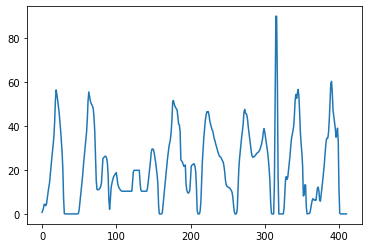

In [64]:
plt.plot(s[0]) # plot the sum of the image
plt.show()

In [66]:
plak = img.copy()

# find the first and last non-zero pixel in each column to get each numbet in plate
img = cv2.line(img, (38,0), (38,90), (0,255,0), 2) # draw a line to separate the numbers
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
# find the first and last non-zero pixel in each column to get each number in plate
xi = 0 
flag1 = False
flag2 = False
xi1 = 0
xi2 = 0
img_ar = []

for i in s[0]:
    xi += 1

    if i > 9 and flag1 and not flag2:
        flag2 = True

    if i < 5:
        img = cv2.line(img, (xi, 0), (xi, 90), (0, 0, 255), 2)

        if not flag1:
            xi1 = xi
            
        if flag2:
            xi2 = xi
            flag2 = False
            flag1 = False
            img1 = img[:, xi1:xi2]
            x1 = np.empty((0, 256))
            im2 = cv2.resize(img1, (8, 32)) # resize the image to 8x32 for every image
            im4 = im3.flatten() # flatten the image to 1d
            x1 = np.append(x1, [im4], axis=0) # append the image to the dataset, axis=0 means we are adding a new row and im4 is the new row
            result = model.predict(x1)
            print(result)
            #print(xi1, xi2)
            cv2.imshow('image', img1)
            cv2.waitKey(0)
            cv2.destroyAllWindows()

            xi1 = xi2

        flag1 = True

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
[9.]
